In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#한글설정
import matplotlib.pyplot as plt
from matplotlib import rc
%matplotlib inline
rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False
import warnings
warnings.filterwarnings(action='ignore')

In [9]:
df = pd.read_csv('df_std.csv',encoding='euc-kr')
df_based=df.copy()
df.head()

,pa,ep,fp,yp,cctv,light,nb,gid
0,0.757896,0.238218,0.178516,0.0,0.000000,0.592419,0.250172,ㅼ궗58ab30ba
1,0.749224,0.000000,0.000000,0.0,0.000000,0.735251,0.250172,ㅼ궗58bb30ab
2,0.749224,0.000000,0.000000,0.0,0.000000,0.655714,0.250172,ㅼ궗59aa30aa
3,0.749224,0.000000,0.000000,0.0,0.000000,0.628545,0.320499,ㅼ궗59aa30ab
4,0.727538,0.000000,0.000000,0.0,0.529358,0.539505,0.363463,ㅼ궗59ab30aa


In [10]:
#스케일링 하기 전 features 불러오기
# df2=df[['year','cctv','light']]

# from sklearn.preprocessing import RobustScaler
# scaler = RobustScaler()
# df2_std = scaler.fit_transform(df2)
# df2_std = pd.DataFrame(df2_std, columns=['year','cctv','light'])
# df2_std.head()

# #원래 데이터를 표준화한 데이터로 교체
# df['year']=df2_std['year']
# df['cctv']=df2_std['cctv']
# df['light']=df2_std['light']
# df.to_csv('data_con_std.csv',encoding='euc-kr',index=False)

# gid remove
df.drop(columns=['gid'],inplace=True)
df.head()

,pa,ep,fp,yp,cctv,light,nb
0,0.757896,0.238218,0.178516,0.0,0.000000,0.592419,0.250172
1,0.749224,0.000000,0.000000,0.0,0.000000,0.735251,0.250172
2,0.749224,0.000000,0.000000,0.0,0.000000,0.655714,0.250172
3,0.749224,0.000000,0.000000,0.0,0.000000,0.628545,0.320499
4,0.727538,0.000000,0.000000,0.0,0.529358,0.539505,0.363463


## KMedoids Clustering

In [10]:
!pip install scikit-learn-extra

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.0/819.0 kB 8.1 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-learn-extra: filename=scikit_learn_extra-0.3.0-cp310-cp310-macosx_11_0_arm64.whl size=349147 sha256=4d73e636d72b3f90b23ea9d6523bfc6fd7028fdc8a16d35224b0c63e381e1423
  Stored in directory: /Users/seoihwan/Library/Caches/pip/wheels/60/e1/7f/881b5af199acf453d55d49d38e227d291fe5b562099ac29a68
Successfully built scikit-learn-extra


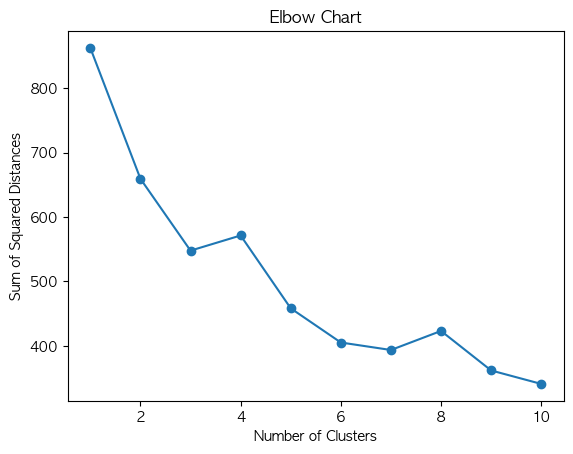

In [11]:
from sklearn_extra.cluster import KMedoids
import numpy as np
import random

random.seed(312)  # 랜덤 시드를 312로 설정

#data 지정
X=df

# Define the range of clusters to try
max_clusters = 10
cluster_range = range(1, max_clusters + 1)

# Calculate the sum of squared distances for each cluster
sse = []
for n_clusters in cluster_range:
    kmedoids = KMedoids(n_clusters=n_clusters, random_state=0)
    kmedoids.fit(X)
    sse.append(kmedoids.inertia_)

# Plot the elbow chart
import matplotlib.pyplot as plt
plt.plot(cluster_range, sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Chart')
plt.show()

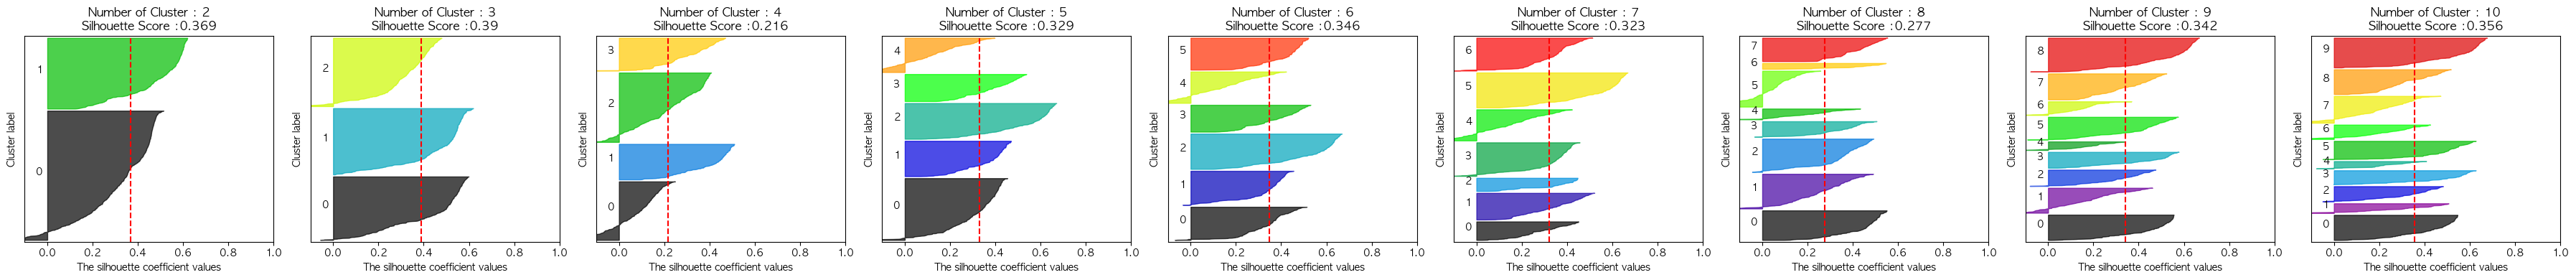

In [12]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn_extra.cluster import KMedoids

def visualize_silhouette(cluster_lists, X_features):
    n_cols = len(cluster_lists)
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    for ind, n_cluster in enumerate(cluster_lists):
        clusterer = KMedoids(n_clusters=n_cluster, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg, 3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

# Convert the DataFrame 'df' to a NumPy array for clustering
X = df.values

# Call the function with the updated parameters
visualize_silhouette([2, 3, 4, 5, 6, 7, 8, 9, 10], X)
plt.tight_layout()
plt.show()

In [6]:
# Perform k-medoids clustering
n_clusters = 5  # Number of clusters
kmedoids = KMedoids(n_clusters=n_clusters, random_state=0)
cluster_labels = kmedoids.fit_predict(X)

# Create a new DataFrame to store the original data along with the cluster labels
df['label'] = cluster_labels
df['gid'] = df_based['gid']
df.head()

,year,cctv,light,log_pa,ep,fp,yp,log_nb,label,gid
0,-0.133333,-0.5,-0.5,1.795010,-0.316027,-0.331228,-0.323077,-1.270062,0,ㅼ궗58ab30ba
1,1.933333,-0.5,-0.5,1.742831,-0.343115,-0.341053,-0.323077,-1.270062,0,ㅼ궗58bb30ab
2,1.000000,-0.5,-0.5,1.742831,-0.343115,-0.341053,-0.323077,-1.270062,0,ㅼ궗59aa30aa
3,1.600000,-0.5,-0.5,1.742831,-0.343115,-0.341053,-0.323077,-1.029431,0,ㅼ궗59aa30ab
4,4.133333,0.0,0.0,1.612460,-0.343115,-0.341053,-0.323077,-1.029431,3,ㅼ궗59ab30aa


In [7]:
df.to_csv('kmedoids_con_5.csv',encoding='euc-kr',index=False)

In [8]:
unique_labels, label_counts = np.unique(cluster_labels, return_counts=True)

# 각 군집의 데이터 포인트 수 출력
for label, count in zip(unique_labels, label_counts):
    print(f"Cluster {label}: {count} data points")

Cluster 0: 290 data points
Cluster 1: 210 data points
Cluster 2: 182 data points
Cluster 3: 165 data points
Cluster 4: 203 data points
